# Checking the mushroom type(edible or poisionous) with ML algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
path='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/mushrooms.csv'
df=pd.read_csv(path)

In [3]:
print(df.shape)
df.head()

(8124, 23)


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [5]:
df.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

Poisonous to edible ratio: 0.93 
Poisonous mushrooms count: 3916 
Edible mushrooms count: 4208 


<AxesSubplot:title={'center':'Checking the type of mushrooms'}, xlabel='type', ylabel='count'>

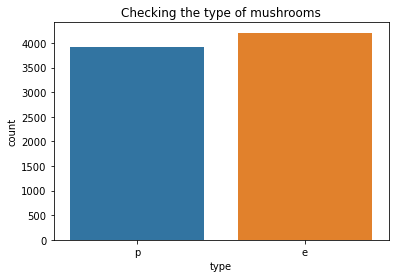

In [6]:
#Checking input mushroom balance
#Checking poisonus to edible ratio
poi_cnt=df[df['type']=='p']['type'].count()
edi_cnt=df[df['type']=='e']['type'].count()
pe_ratio=poi_cnt/edi_cnt
print('Poisonous to edible ratio: {} \nPoisonous mushrooms count: {} \nEdible mushrooms count: {} '.format(pe_ratio.round(2),poi_cnt,edi_cnt))
#Visualization
#sns.set(style='ticks',color_codes=True)
plt.title('Checking the type of mushrooms')
sns.countplot(x=df['type'],data=df)

In [7]:
columns=df.columns.values
for column in columns:
    print('{0} : {1}'.format(column,df[column].unique()))

type : ['p' 'e']
cap_shape : ['x' 'b' 's' 'f' 'k' 'c']
cap_surface : ['s' 'y' 'f' 'g']
cap_color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill_attachment : ['f' 'a']
gill_spacing : ['c' 'w']
gill_size : ['n' 'b']
gill_color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk_shape : ['e' 't']
stalk_root : ['e' 'c' 'b' 'r' '?']
stalk_surface_above_ring : ['s' 'f' 'k' 'y']
stalk_surface_below_ring : ['s' 'f' 'y' 'k']
stalk_color_above_ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk_color_below_ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil_type : ['p']
veil_color : ['w' 'n' 'o' 'y']
ring_number : ['o' 't' 'n']
ring_type : ['p' 'e' 'l' 'f' 'n']
spore_print_color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
#processing incorrect data in stalk_root column
stalk_root_q=df[df['stalk_root']=='?']['stalk_root'].count()
stalk_root_q

2480

<AxesSubplot:xlabel='stalk_root', ylabel='count'>

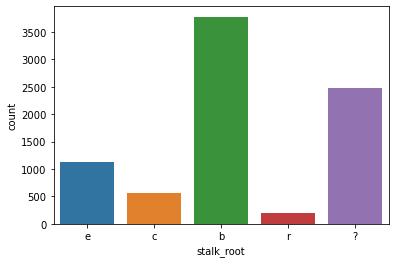

In [9]:
sns.countplot(x=df['stalk_root'],data=df)

In [3]:
df['stalk_root'].replace({'?':'NA'},inplace=True)

<AxesSubplot:xlabel='stalk_root', ylabel='count'>

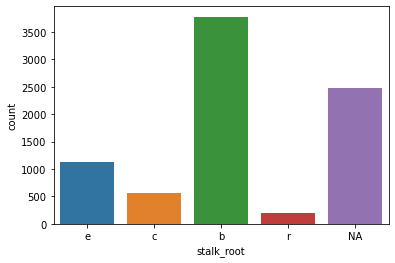

In [11]:
sns.countplot(x=df['stalk_root'],data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

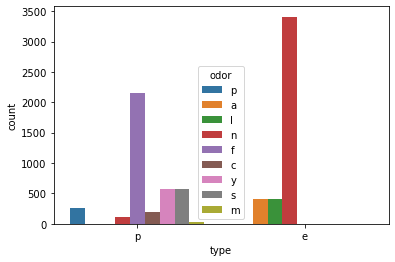

In [12]:
sns.countplot(x='type',hue='odor',data=df)

In [4]:
#Data pre processing
df_en=df.drop(['type'],axis=1)

In [5]:
df_en=pd.get_dummies(df_en,columns=['cap_shape','cap_surface','cap_color','bruises','odor', 'gill_attachment',
 'gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
 'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
 'ring_number','ring_type','spore_print_color','population','habitat'])

In [6]:
df_en

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [23]:
df_en.shape

(8124, 117)

In [7]:
df['type'].replace({'p':0,'e':1},inplace=True)

In [8]:
target=df[['type']]
target

,type
0,0
1,1
2,1
3,0
4,1
...,...
8119,1
8120,1
8121,1
8122,0


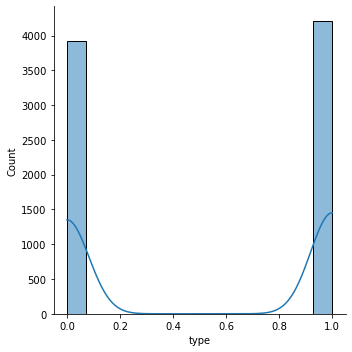

In [26]:
sns.displot(target['type'],kde='True')

<ipython-input-27-d306a83da32c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_en,target)


[6.44117856e-04 1.29036458e-04 4.69913791e-04 1.11511128e-04
 5.29221373e-04 8.24739232e-04 5.21286595e-03 1.44945032e-04
 3.60485237e-03 1.56281435e-03 2.61215152e-03 5.81750430e-04
 3.18904601e-04 1.28765383e-03 6.17731163e-04 2.38941878e-03
 2.46201020e-04 1.91420754e-04 2.69662111e-03 2.80121355e-03
 2.46786833e-02 2.85137682e-02 6.30235184e-03 1.08322891e-02
 6.77180743e-02 7.22791793e-03 1.04052652e-03 1.15393418e-01
 1.40541521e-02 4.47860601e-03 8.65199581e-03 8.61873980e-04
 6.86063997e-04 1.72707853e-02 1.74584044e-02 5.32248303e-02
 7.50901383e-02 4.31237285e-02 1.58628486e-05 1.11425417e-03
 5.03971683e-04 4.35553021e-04 4.06004878e-03 1.35291951e-04
 2.77302564e-05 1.61189489e-03 2.03980467e-04 3.33213397e-03
 2.39478834e-04 1.28979476e-02 1.07586007e-02 9.00927735e-03
 1.39574804e-02 7.45171394e-03 8.83648937e-03 9.45061225e-04
 6.33871375e-03 6.14416789e-02 2.87833243e-02 2.44934153e-04
 4.48899941e-03 4.03750503e-02 9.58235574e-03 2.94636444e-03
 1.20034257e-03 4.892270

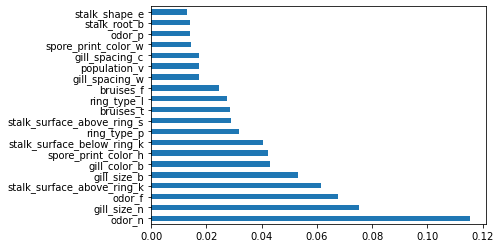

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df_en,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_en.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [9]:
#Splitting the dataset
X=df_en
y=target

In [10]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Standardization of the columns
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

# Principles of component analysis

In [12]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2)
 
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [13]:
X_pca_train

array([[ 4.13187322,  3.73028641],
       [ 3.53392504,  2.74723176],
       [ 3.44432169,  3.99328112],
       ...,
       [-2.620062  , -0.92613606],
       [ 4.23494441,  3.35892685],
       [-1.00490638,  0.32899837]])

# Decision tree algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_pca_train, y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dt = dt.predict(X_pca_test)

In [47]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:",confusion_matrix(y_test, y_pred_dt))
print("Accuracy:",accuracy_score(y_test,y_pred_dt)*100)
result=accuracy_score(y_test,y_pred_dt)*100

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       782
           1       0.93      0.94      0.94       843

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625

Confusion Matrix: [[722  60]
 [ 47 796]]
Accuracy: 93.41538461538461


In [48]:
pred_prob1 = dt.predict_proba(X_pca_test)

In [49]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [50]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.9337601975650233


# Random forest algorithm

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_pca_train, y_train)

<ipython-input-51-d8607489525f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_pca_train, y_train)


RandomForestClassifier(n_estimators=50)

In [52]:
y_pred = classifier.predict(X_pca_test)

In [53]:
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))
result2 = accuracy_score(y_test,y_pred)*100
print("Accuracy:",result2)

Confusion Matrix: [[714  68]
 [ 30 813]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.91      0.94       782
           1       0.92      0.96      0.94       843

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

Accuracy: 93.96923076923078


In [54]:
pred_prob2 = classifier.predict_proba(X_pca_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.9861178108873133


# Naive bayes algorithm

In [13]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_pca_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [14]:
predictions_naive=model.predict(X_pca_test)

In [17]:
print("Confusion Matrix:",confusion_matrix(y_test, predictions_naive))
print("Classification Report:",classification_report(y_test, predictions_naive))
print("Accuracy:",accuracy_score(y_test,predictions_naive)*100)
result3=accuracy_score(y_test,predictions_naive)*100

Confusion Matrix: [[613 169]
 [ 66 777]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.78      0.84       782
           1       0.82      0.92      0.87       843

    accuracy                           0.86      1625
   macro avg       0.86      0.85      0.85      1625
weighted avg       0.86      0.86      0.85      1625

Accuracy: 85.53846153846155


# K NearestNeighbour classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_pca_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [23]:
prediction_knn = knn.predict(X_pca_test)

In [24]:
print(confusion_matrix(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))
print(accuracy_score(y_test,prediction_knn)*100)
result4=accuracy_score(y_test,prediction_knn)*100

[[735  47]
 [ 38 805]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       782
           1       0.94      0.95      0.95       843

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

94.76923076923077


In [62]:
pred_prob4 = model.predict_proba(X_pca_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.8929471835152132


# Cross validation(StratifiedKFold)

In [37]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]

In [38]:
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,y):
    print('Train:',train_index,'\nValidation:',test_index)
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    
    X1_pca_train = pca.fit_transform(X1_train)
    X1_pca_test = pca.transform(X1_test)
 
    explained_variance1 = pca.explained_variance_ratio_
    
    dt.fit(X1_pca_train,y1_train)
    prediction=dt.predict(X1_pca_test)
    score=accuracy_score(y1_test,prediction)
    accuracy.append(score)
print(accuracy)

Train: [ 936  937  938 ... 8121 8122 8123] 
Validation: [   0    1    2 ... 4126 4128 4130]
Train: [   0    1    2 ... 8121 8122 8123] 
Validation: [ 936  937  938 ... 5008 5009 5011]
Train: [   0    1    2 ... 8121 8122 8123] 
Validation: [1910 1911 1912 ... 6027 6028 6029]
Train: [   0    1    2 ... 8121 8122 8123] 
Validation: [2808 2809 2810 ... 6844 6845 6846]
Train: [   0    1    2 ... 6844 6845 6846] 
Validation: [4276 4283 4291 ... 8121 8122 8123]
[0.7335384615384616, 0.9095384615384615, 0.848, 0.9095384615384615, 0.8466748768472906]


In [53]:
models=pd.DataFrame({'Model': ['Desision Tree','Random Forest','Naive bayes','K-Nearest Neighbour'], 'Accuracy':[result,result2,
                                result3,result4]})

In [54]:
models

,Model,Accuracy
0,Desision Tree,93.476923
1,Random Forest,94.646154
2,Naive bayes,85.538462
3,K-Nearest Neighbour,94.769231


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

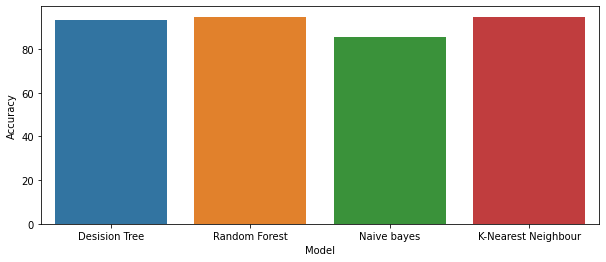

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(models['Model'],models['Accuracy'])

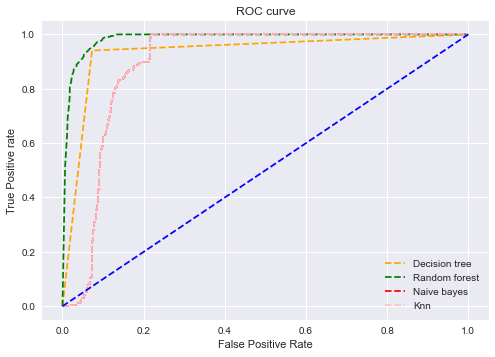

In [42]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Naive bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Knn')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();